In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CC GENERAL.csv').drop('CUST_ID', axis = 1)

In [3]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [5]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### PREPROCESSING

In [6]:
df = df.dropna()

In [7]:
# scaling data to bring all attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
# normalizing data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [9]:
# converting numpy array into pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311806,-0.154954,-0.179717,-0.150396,-0.148581,-0.196246,-0.343691,-0.287374,-0.300313,-0.285562,-0.200761,-0.216751,-0.403071,-0.227772,-0.127929,-0.225169,0.148729
1,0.215652,0.019100,-0.133545,-0.101359,-0.129489,0.724875,-0.348852,-0.193676,-0.261474,0.157198,0.028012,-0.168495,0.191114,0.224880,0.024747,0.059936,0.100236
2,0.121694,0.144174,-0.033208,0.028501,-0.130890,-0.133690,0.358313,0.754993,-0.264303,-0.194536,-0.136766,-0.034365,0.232162,-0.113964,-0.028500,-0.153394,0.101320
3,-0.156537,0.211587,-0.195017,-0.146385,-0.192092,-0.196202,-0.430561,-0.171033,-0.387886,-0.285498,-0.200715,-0.233329,-0.380097,-0.159155,-0.109322,-0.225118,0.148696
4,0.045686,0.231939,0.065195,-0.164825,0.456538,-0.215074,0.195195,-0.314946,0.247302,-0.312960,-0.220022,-0.128189,-0.341406,-0.060632,0.298463,-0.246772,0.162999


### PCA (Principal Component Analysis)
- Reducing dimensionality of data to make it visualizable

In [10]:
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']
df_principal.head()

,P1,P2
0,-0.481788,-0.692991
1,-0.537375,0.527809
2,0.320760,0.265222
3,-0.562994,-0.503869
4,0.320512,-0.254472


In [11]:
# information ratio in PCA result
pca.explained_variance_ratio_

array([0.29255562, 0.18306542])

#### Inverse Transform

In [12]:
# let's try index 0 
df_back_to_normal = pca.inverse_transform(df_principal)[0]

In [13]:
df_back_to_normal

array([-0.30186248, -0.13392723, -0.23451272, -0.18841032, -0.208078  ,
       -0.21674417, -0.32744689, -0.31227761, -0.25587727, -0.22759968,
       -0.20291721, -0.28615036, -0.35589768, -0.24037697, -0.12336836,
       -0.08559181,  0.05784516])

In [14]:
# inverse transform df_principal
scaler.inverse_transform(df_back_to_normal)

array([9.68687171e+02, 8.67220455e-01, 5.17248908e+02, 2.87578846e+02,
       2.29996043e+02, 5.34388420e+02, 3.64612132e-01, 1.12214143e-01,
       2.66963310e-01, 9.16791980e-02, 1.91133324e+00, 7.82825013e+00,
       3.21985128e+03, 1.08506725e+03, 5.71622279e+02, 1.33946729e-01,
       1.16102206e+01])

In [15]:
# we can compare it with original dataset
df_normalized.iloc[0]

0    -0.311806
1    -0.154954
2    -0.179717
3    -0.150396
4    -0.148581
5    -0.196246
6    -0.343691
7    -0.287374
8    -0.300313
9    -0.285562
10   -0.200761
11   -0.216751
12   -0.403071
13   -0.227772
14   -0.127929
15   -0.225169
16    0.148729
Name: 0, dtype: float64

### Building Clustering Model

In [16]:
# numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(df_principal)
labels = db_default.labels_

### Visualizing the Clustering

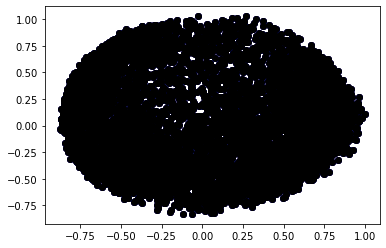

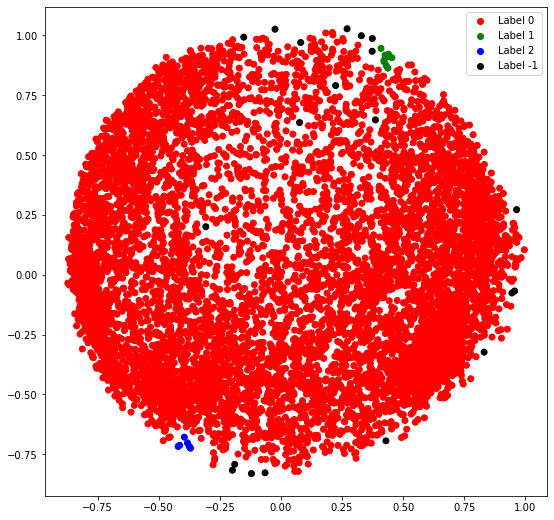

In [17]:
# building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# building the colour vector for each data point
cvec = [colours[label] for label in labels]

# contructing legend in plot
r = plt.scatter(df_principal['P1'], df_principal['P2'], color = 'r')
g = plt.scatter(df_principal['P1'], df_principal['P2'], color = 'g')
b = plt.scatter(df_principal['P1'], df_principal['P2'], color = 'b')
k = plt.scatter(df_principal['P1'], df_principal['P2'], color = 'k')

# plotting P1 on X-axis and P2 on Y-axis according to the colour vector defined
plt.figure(figsize = (9,9))
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec)

# legend
plt.legend((r,g,b,k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()

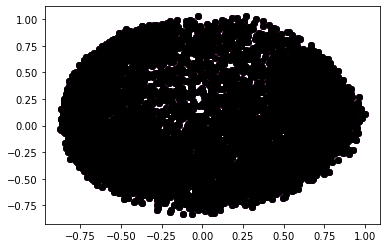

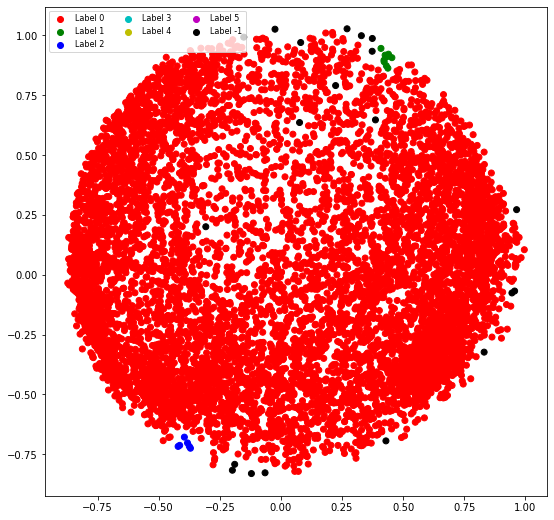

In [18]:
# building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'c'
colours[4] = 'y'
colours[5] = 'm'
colours[-1] = 'k'

# building the colour vector for each data point
cvec = [colours[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

# contructing legend in plot
r = plt.scatter(df_principal['P1'], df_principal['P2'], marker = 'o', color = colors[0])
g = plt.scatter(df_principal['P1'], df_principal['P2'], marker = 'o', color = colors[1])
b = plt.scatter(df_principal['P1'], df_principal['P2'], marker = 'o', color = colors[2])
c = plt.scatter(df_principal['P1'], df_principal['P2'], marker = 'o', color = colors[3])
y = plt.scatter(df_principal['P1'], df_principal['P2'], marker = 'o', color = colors[4])
m = plt.scatter(df_principal['P1'], df_principal['P2'], marker = 'o', color = colors[5])
k = plt.scatter(df_principal['P1'], df_principal['P2'], marker = 'o', color = colors[-1])

# plotting P1 on X-axis and P2 on Y-axis according to the colour vector defined
plt.figure(figsize = (9,9))
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec)

# legend
plt.legend((r,g,b,c,y,m,k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, loc = 'upper left', ncol = 3, fontsize = 8)

plt.show()

### KMEANS CLUSTERING

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

In [20]:
df1 = df_principal.copy()

In [21]:
inertia=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[4018.286354543648, 2048.6227991283417, 1287.2957922839084, 899.8325125864072, 703.034833101508, 583.872478062083, 498.78667656435005, 421.75164315647436, 370.06666952030355, 331.56874401275735]


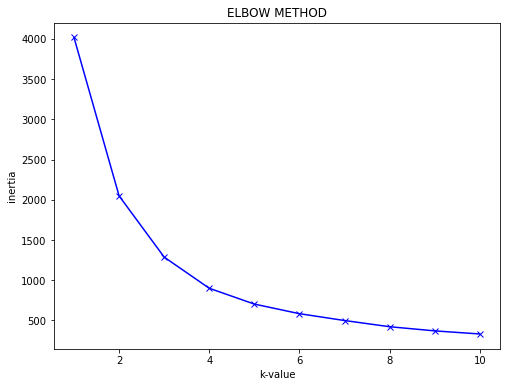

In [22]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), inertia, '-bx')
plt.xlabel('k-value')
plt.ylabel('inertia')
plt.title('ELBOW METHOD')
plt.show()

In [23]:
model_KM = KMeans(n_clusters = 4, init = 'k-means++')
model_pred = model_KM.fit_predict(df1)

In [24]:
df1['cluster'] = model_pred

In [25]:
df1.head()

,P1,P2,cluster
0,-0.481788,-0.692991,1
1,-0.537375,0.527809,3
2,0.320760,0.265222,2
3,-0.562994,-0.503869,1
4,0.320512,-0.254472,0


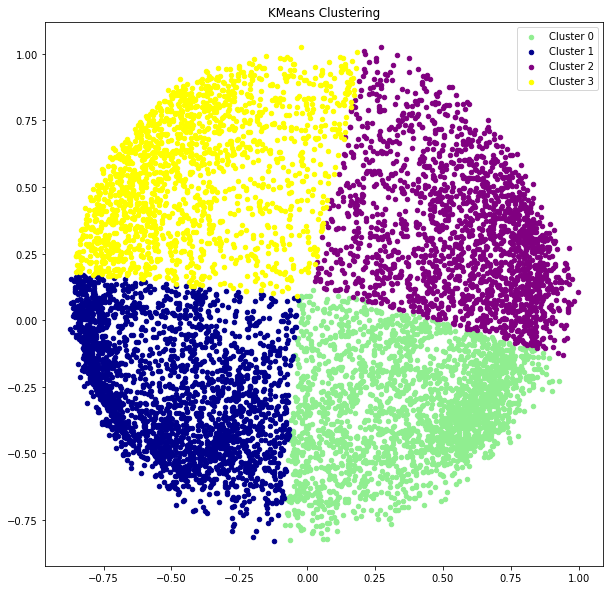

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(df1['P1'][df1['cluster'] == 0], df1['P2'][df1['cluster'] == 0], s=20, color='lightgreen', label = 'Cluster 0')
plt.scatter(df1['P1'][df1['cluster'] == 1], df1['P2'][df1['cluster'] == 1], s=20, color='darkblue', label = 'Cluster 1')
plt.scatter(df1['P1'][df1['cluster'] == 2], df1['P2'][df1['cluster'] == 2], s=20, color='purple', label = 'Cluster 2')
plt.scatter(df1['P1'][df1['cluster'] == 3], df1['P2'][df1['cluster'] == 3], s=20, color='yellow', label = 'Cluster 3')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

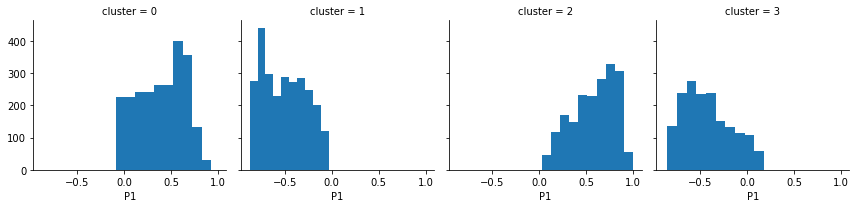

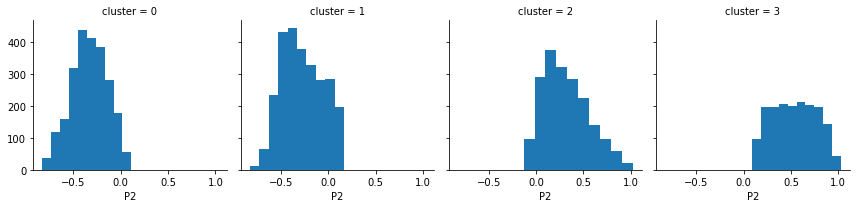

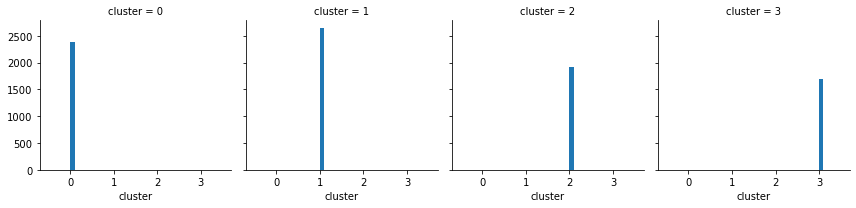

In [27]:
for i in df1:
    grid = sns.FacetGrid(data = df1, col = 'cluster')
    grid.map(plt.hist, i)

In [28]:
df2 = df_scaled.copy()

In [29]:
df2

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

In [30]:
model_KM2 = KMeans(n_clusters = 4, init = 'k-means++')
model_KM2.fit(df2)

KMeans(n_clusters=4)

In [31]:
model_pred2 = model_KM2.fit_predict(df2)

In [32]:
df_clust = pd.concat([df, pd.DataFrame({'cluster':model_pred2})], axis=1).dropna()

In [33]:
df_clust.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,3.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,0.0


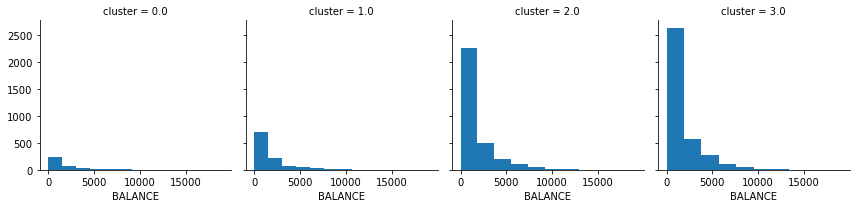

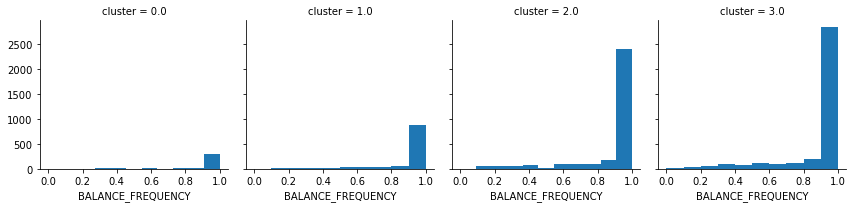

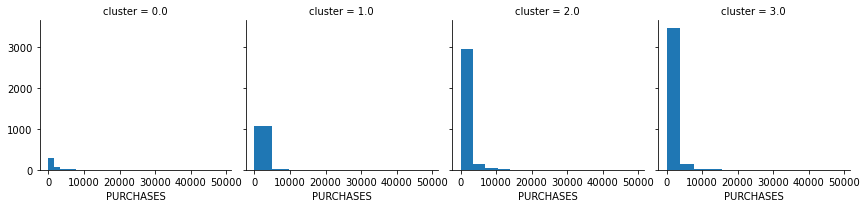

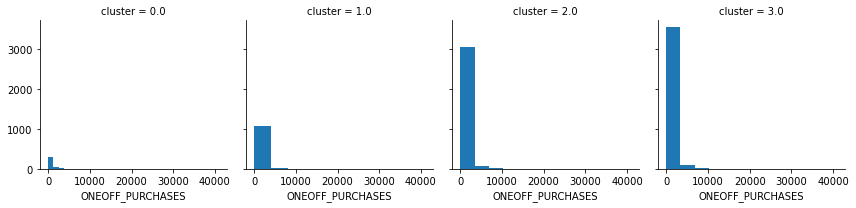

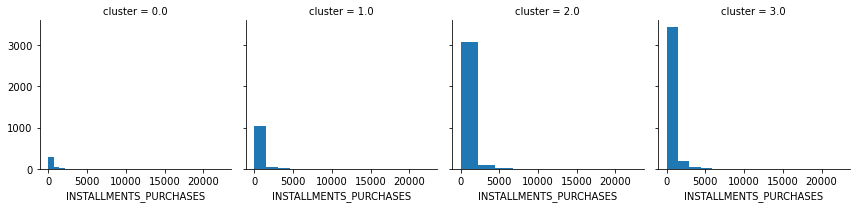

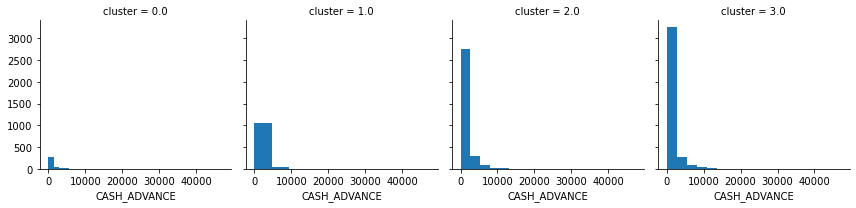

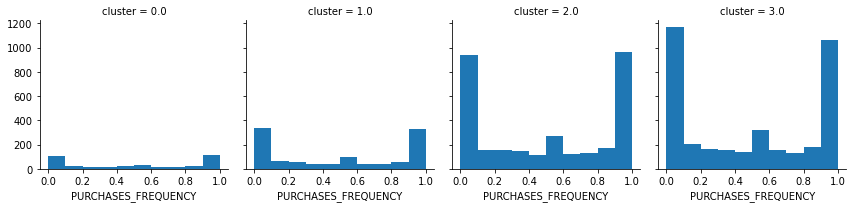

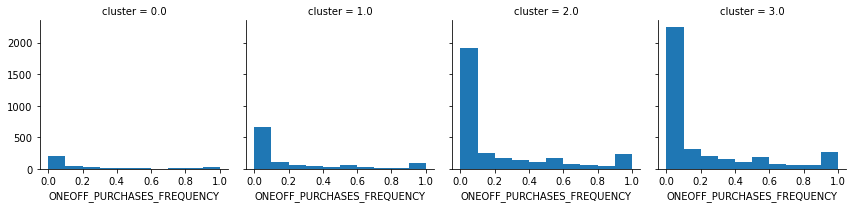

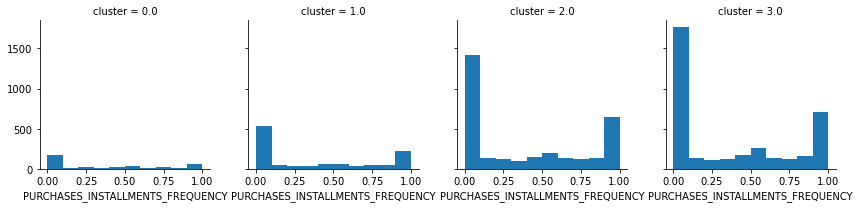

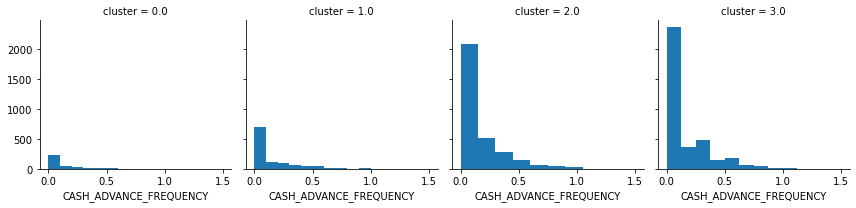

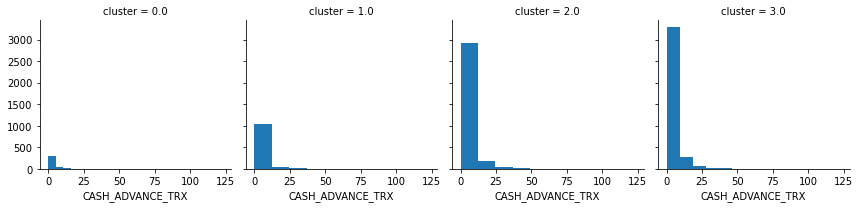

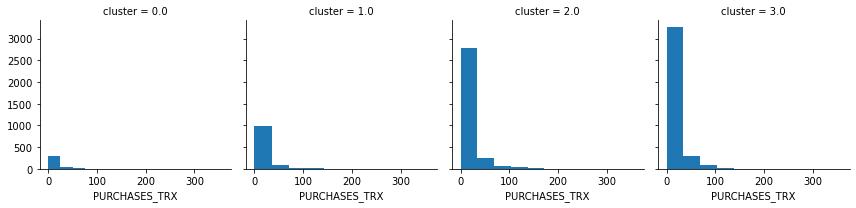

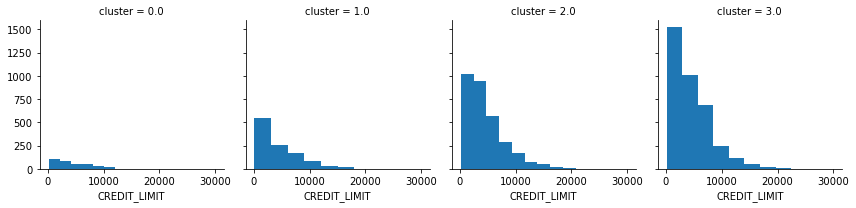

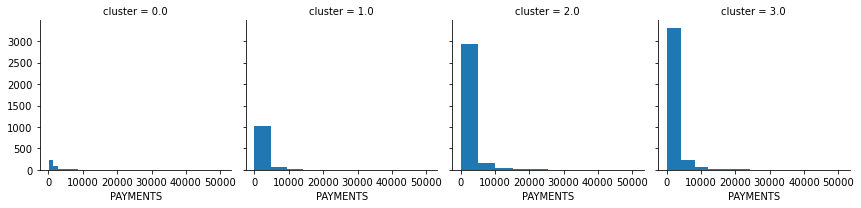

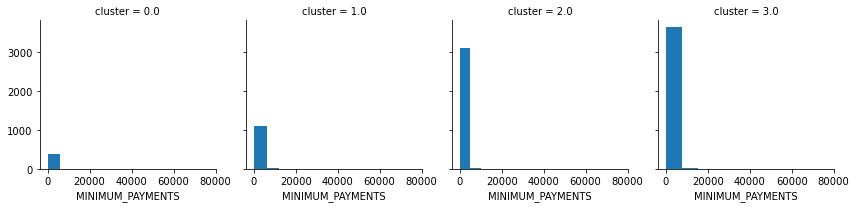

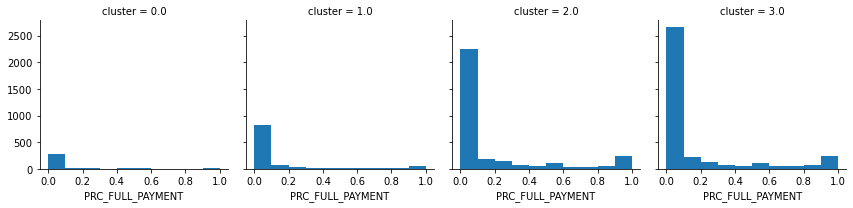

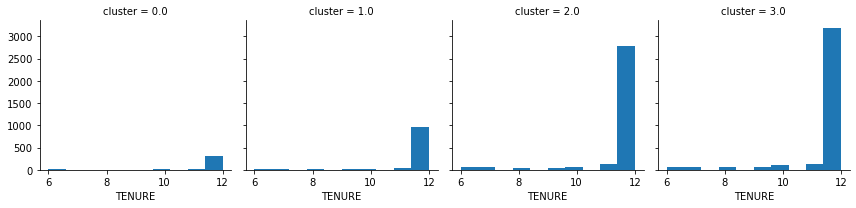

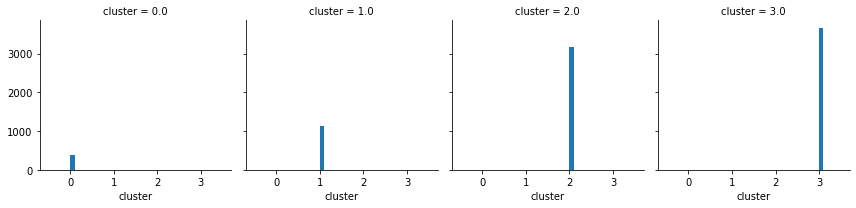

In [34]:
for i in df_clust:
    grid = sns.FacetGrid(df_clust, col='cluster')
    grid.map(plt.hist, i)

***Following is the Data Dictionary for Credit Card dataset :***

- CUSTID : Identification of Credit Card holder (Categorical)


- BALANCE : Balance amount left in their account to make purchases (


- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)


- PURCHASES : Amount of purchases made from account


- ONEOFFPURCHASES : Maximum purchase amount done in one-go


- INSTALLMENTSPURCHASES : Amount of purchase done in installment


- CASHADVANCE : Cash in advance given by the user


- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)


- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)


- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)


- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid


- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"


- PURCHASESTRX : Numbe of purchase transactions made


- CREDITLIMIT : Limit of Credit Card for user


- PAYMENTS : Amount of Payment done by user


- MINIMUM_PAYMENTS : Minimum amount of payments made by user


- PRCFULLPAYMENT : Percent of full payment paid by user


- TENURE : Tenure of credit card service for user

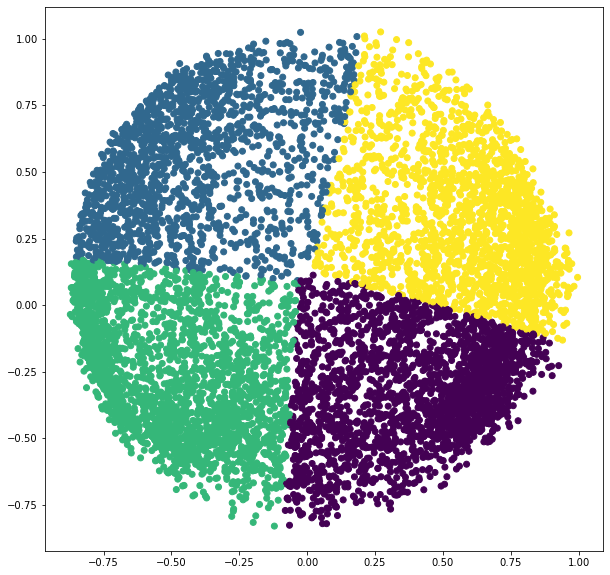

In [35]:
plt.figure(figsize = (10,10))
plt.scatter(df1['P1'], df1['P2'],  c = KMeans(n_clusters = 4).fit_predict(df1)) 
plt.show()